In [127]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from white_demura import RGB_mask, sum_contour, read_and_extract_roi, apply_mask, get_signal_mapping, generate_mapping, extract_middle_roi


In [128]:
def RGB_mask_no_roi(image_path, output_path, threshold_val):
    """
    Preprocess an image by cropping and thresholding.

    Args:
        image_path (str): Path to the input grayscale image.
        threshold_val (int, optional): Threshold value for image thresholding.

    Returns:
        tuple: Tuple containing threshold value and path to the preprocessed image.
    """

    df = pd.DataFrame(columns=['id', 'x', 'y', 'area', 'perimeter', 'total_signal'])

    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

 
    # Filter out pixels with intensities below the threshold_val
    _, image_filtered = cv2.threshold(image, threshold_val, 255, cv2.THRESH_TOZERO)


    binary_image = np.where(image_filtered > 0,255,0)
    cv2.imwrite("binary.jpg", binary_image)


    print("Threshold value:", threshold_val)

    # Save and download to local disk
    # Extract the filename from the original image path
    filename = image_path.split("/")[-1]

    # Create the new path by concatenating the desired directory and the filename
    new_path = os.path.dirname(image_path) + "/thresholded/"

    # Create the folder if it doesn't exist
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    contours, _ = cv2.findContours(image_filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
   # cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = []
    # Create a copy of the original image
    image_with_rectangles = np.copy(image_filtered)

    
    threshold_area = 100

    id = 0
    for i in range(0, len(contours)):
        contour = contours[i]
    #for contour in contours:
        area = cv2.contourArea(contour)    
             
        if area > threshold_area:  
            filtered_contours.append(contour)
            x, y, w, h = cv2.boundingRect(contour)
            #cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (155), 1)  # Adjust color and thickness as needed
            cv2.drawContours(image_with_rectangles, [contour], -1, 100, 1)

            M = cv2.moments(contour)
            area = M["m00"]
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # Perimeter
            perimeter = cv2.arcLength(contour, True)
            centroid = [cX, cY]
            cv2.circle(image_with_rectangles, (cX, cY), 0, (0), -1)
            cv2.putText(image_with_rectangles, str(id), (cX - 2, cY - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
            

            signal = sum_contour(contour, image)
            df.loc[len(df.index)] = [id, cX, cY, area, perimeter, signal]
            print("ID :", id)
            id = id + 1
                
    #Check the images with bounding rectangles
    cv2.imwrite(output_path, image_with_rectangles)
    
    new_path += filename

    cv2.imwrite(new_path, image_filtered)

    print("Saved thresholded image to: {}".format(new_path))

    return threshold_val, new_path, filtered_contours, df, binary_image

In [129]:
# width_ratio = 2, 4 

def scale_image(image, width_ratio, height_ratio):
    width = image.shape[1]
    height = image.shape[0]
    resized_image = cv2.resize(image, (int(width // width_ratio), int(height // height_ratio)))
    return resized_image


In [130]:
blue_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Z_300000000.bmp', -2100, -200)
blue_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Z_110000000.bmp', -2100, -200)
blue_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Z_21000000.bmp', -2100, -200)
blue_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Z_6500000.bmp', -2100, -200)
blue_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Z_1100000.bmp', -2100, -200)
blue_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Z_200000.bmp', -2100, -200)
blue_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Z_40000.bmp', -2100, -200)

In [131]:
green_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_Y_200000000.bmp', -2100, -200)
green_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_Y_40000000.bmp', -2100, -200)
green_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_Y_12500000.bmp', -2100, -200)
green_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_Y_3000000.bmp', -2100, -200)
green_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_Y_650000.bmp', -2100, -200)
green_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_Y_130000.bmp', -2100, -200)
green_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_Y_25000.bmp', -2100, -200)

In [132]:
red_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_X_200000000.bmp', -2100, -200)
red_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_X_70000000.bmp', -2100, -200)
red_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_X_16000000.bmp', -2100, -200)
red_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_X_5000000.bmp', -2100, -200)
red_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_X_850000.bmp', -2100, -200)
red_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_X_180000.bmp', -2100, -200)
red_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_X_30000.bmp', -2100, -200)

In [133]:
clear_image_4 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4_4_4_clear_200000000.bmp', -2100, -200)
clear_image_8 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/8_8_8_clear_70000000.bmp', -2100, -200)
clear_image_16 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/16_16_16_clear_16000000.bmp', -2100, -200)
clear_image_32 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/32_32_32_clear_4000000.bmp', -2100, -200)
clear_image_64 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/64_64_64_clear_700000.bmp', -2100, -200)
clear_image_128 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/128_128_128_clear_180000.bmp', -2100, -200)
clear_image_255 = read_and_extract_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/255_255_255_clear_30000.bmp', -2100, -200)

In [134]:
contours, _ = cv2.findContours(green_image_255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [135]:
len(contours)

1

In [136]:
red_image_4_4x4 = scale_image(red_image_4, 4, 4)
red_image_8_4x4 = scale_image(red_image_8, 4, 4)
red_image_16_4x4 = scale_image(red_image_16, 4, 4)
red_image_32_4x4 = scale_image(red_image_32, 4, 4)
red_image_64_4x4 = scale_image(red_image_64, 4, 4)
red_image_128_4x4 = scale_image(red_image_128, 4, 4)
red_image_255_4x4 = scale_image(red_image_255, 4, 4)

In [137]:
blue_image_4_4x4 = scale_image(blue_image_4, 4, 4)
blue_image_8_4x4 = scale_image(blue_image_8, 4, 4)
blue_image_16_4x4 = scale_image(blue_image_16, 4, 4)
blue_image_32_4x4 = scale_image(blue_image_32, 4, 4)
blue_image_64_4x4 = scale_image(blue_image_64, 4, 4)
blue_image_128_4x4 = scale_image(blue_image_128, 4, 4)
blue_image_255_4x4 = scale_image(blue_image_255, 4, 4)

In [138]:
green_image_4_4x4 = scale_image(green_image_4, 4, 4)
green_image_8_4x4 = scale_image(green_image_8, 4, 4)
green_image_16_4x4 = scale_image(green_image_16, 4, 4)
green_image_32_4x4 = scale_image(green_image_32, 4, 4)
green_image_64_4x4 = scale_image(green_image_64, 4, 4)
green_image_128_4x4 = scale_image(green_image_128, 4, 4)
green_image_255_4x4 = scale_image(green_image_255, 4, 4)

In [139]:
clear_image_4_4x4 = scale_image(clear_image_4, 4, 4)
clear_image_8_4x4 = scale_image(clear_image_8, 4, 4)
clear_image_16_4x4 = scale_image(clear_image_16, 4, 4)
clear_image_32_4x4 = scale_image(clear_image_32, 4, 4)
clear_image_64_4x4 = scale_image(clear_image_64, 4, 4)
clear_image_128_4x4 = scale_image(clear_image_128, 4, 4)
clear_image_255_4x4 = scale_image(clear_image_255, 4, 4)

In [140]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_4_4x4.png', blue_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_8_4x4.png', blue_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_16_4x4.png', blue_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_32_4x4.png', blue_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_64_4x4.png', blue_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_128_4x4.png', blue_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/blue/blue_image_255_4x4.png', blue_image_255_4x4)



True

In [141]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_4_4x4.png', red_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_8_4x4.png', red_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_16_4x4.png', red_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_32_4x4.png', red_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_64_4x4.png', red_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_128_4x4.png', red_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/red/red_image_255_4x4.png', red_image_255_4x4)



True

In [142]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_4_4x4.png', green_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_8_4x4.png', green_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_16_4x4.png', green_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_32_4x4.png', green_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_64_4x4.png', green_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_128_4x4.png', green_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_255_4x4.png', green_image_255_4x4)

True

In [143]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_4_4x4.png', clear_image_4_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_8_4x4.png', clear_image_8_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_16_4x4.png', clear_image_16_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_32_4x4.png', clear_image_32_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_64_4x4.png', clear_image_64_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_128_4x4.png', clear_image_128_4x4)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/clear/clear_image_255_4x4.png', clear_image_255_4x4)


True

In [144]:
clear_image_4_4x4

array([[ 12,  20,  25, ...,   9,  37, 103],
       [ 10,  18,  22, ...,  11, 169, 255],
       [ 15, 232, 255, ...,  10,  34, 116],
       ...,
       [ 20,  13, 118, ...,  96,  20,   9],
       [ 75,  19,  14, ...,  28,  18,   8],
       [120,  29,  12, ...,  16,  11,   8]], dtype=uint8)

In [145]:
a, b, contours, df, binary = RGB_mask_no_roi('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/green_image_255_4x4.png','/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/contour_4x4.png', 8)

Threshold value: 8
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/4x4/green/thresholded/green_image_255_4x4.png


In [146]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/binary4x4.png', binary)

True

In [147]:

def check(i, j, n, m):
    return i >= 0 and j >= 0 and i < n and j < m
 
def mark_component(v, vis, i, j, n, m, l):
    if not check(i, j, n, m):
        return
    
    vis[i][j] = True
    if v[i][j] == 255:
        v[i][j] = 0
        #add point to list
        l.append([i, j])

        #marking(connecting all possible part of single island.
        mark_component(v, vis, i + 1, j, n, m, l)
        mark_component(v, vis, i - 1, j, n, m, l)
        mark_component(v, vis, i, j + 1, n, m, l)
        mark_component(v, vis, i, j - 1, n, m, l)

 
v = binary.copy()
n = len(v)
m = len(v[0])
cnt = 0
vis = [[False for j in range(m)] for i in range(n)]
mapping = {}
idx = 0

for i in range(n):
    for j in range(m):
        if not vis[i][j] and v[i][j] == 255:
            cnt += 1
            lst = []
            mark_component(v, vis, i, j, n, m, lst)
            if len(lst) > 8:
                mapping[idx] = lst
                idx = idx + 1

print("The number of islands in the matrix are:")
print(len(mapping))

The number of islands in the matrix are:
1457


In [148]:
mask_image = np.zeros(binary.shape)

In [149]:
for item in mapping:
    for dot in mapping[item]:
        mask_image[dot[0]][dot[1]] = 255

In [150]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/output/green_mask_image.png', mask_image)

True

In [151]:
covered_pixels_mapping = mapping

In [152]:
signal_map_4 = get_signal_mapping(clear_image_4_4x4, covered_pixels_mapping)
signal_map_8 = get_signal_mapping(clear_image_8_4x4, covered_pixels_mapping)
signal_map_16 = get_signal_mapping(clear_image_16_4x4, covered_pixels_mapping)
signal_map_32 = get_signal_mapping(clear_image_32_4x4, covered_pixels_mapping)
signal_map_64 = get_signal_mapping(clear_image_64_4x4, covered_pixels_mapping)
signal_map_128 = get_signal_mapping(clear_image_128_4x4, covered_pixels_mapping)
signal_map_255 = get_signal_mapping(clear_image_255_4x4, covered_pixels_mapping)

In [153]:
signal_map_ground_truth_4 = get_signal_mapping(green_image_4_4x4, covered_pixels_mapping)
signal_map_ground_truth_8 = get_signal_mapping(green_image_8_4x4, covered_pixels_mapping)
signal_map_ground_truth_16 = get_signal_mapping(green_image_16_4x4, covered_pixels_mapping)
signal_map_ground_truth_32 = get_signal_mapping(green_image_32_4x4, covered_pixels_mapping)
signal_map_ground_truth_64 = get_signal_mapping(green_image_64_4x4, covered_pixels_mapping)
signal_map_ground_truth_128 = get_signal_mapping(green_image_128_4x4, covered_pixels_mapping)
signal_map_ground_truth_255 = get_signal_mapping(green_image_255_4x4, covered_pixels_mapping)

## 
(16_Blue) / mean(16_Blue)   = A


(16_ground_truth) / mean(16_ground_truth)   = B 


(A - B) / B 

In [154]:
dff = pd.DataFrame()

In [155]:
dff["4_ground_truth_mapping"] = signal_map_ground_truth_4.values()
dff["8_ground_truth_mapping"] = signal_map_ground_truth_8.values()
dff["16_ground_truth_mapping"] = signal_map_ground_truth_16.values()
dff["32_ground_truth_mapping"] = signal_map_ground_truth_32.values()
dff["64_ground_truth_mapping"] = signal_map_ground_truth_64.values()
dff["128_ground_truth_mapping"] = signal_map_ground_truth_128.values()
dff["255_ground_truth_mapping"] = signal_map_ground_truth_255.values()

In [156]:
dff["4_mapping"] = signal_map_4.values()
dff["8_mapping"] = signal_map_8.values()
dff["16_mapping"] = signal_map_16.values()
dff["32_mapping"] = signal_map_32.values()
dff["64_mapping"] = signal_map_64.values()
dff["128_mapping"] = signal_map_128.values()
dff["255_mapping"] = signal_map_255.values()

In [157]:
dff["4_diff"] = dff["4_ground_truth_mapping"] - dff["4_mapping"]
dff["8_diff"] = dff["8_ground_truth_mapping"] - dff["8_mapping"]
dff["16_diff"] = dff["16_ground_truth_mapping"] - dff["16_mapping"]
dff["32_diff"] = dff["32_ground_truth_mapping"] - dff["32_mapping"]
dff["64_diff"] = dff["64_ground_truth_mapping"] - dff["64_mapping"]
dff["128_diff"] = dff["128_ground_truth_mapping"] - dff["128_mapping"]
dff["255_diff"] = dff["255_ground_truth_mapping"] - dff["255_mapping"]


In [158]:
dff["4_to_gt_ratio"] = dff["4_mapping"] / dff["4_ground_truth_mapping"]
dff["8_to_gt_ratio"] = dff["8_mapping"] / dff["8_ground_truth_mapping"] 
dff["16_to_gt_ratio"] = dff["16_mapping"] / dff["16_ground_truth_mapping"]
dff["32_to_gt_ratio"] = dff["32_mapping"] / dff["32_ground_truth_mapping"]
dff["64_to_gt_ratio"] = dff["64_mapping"] / dff["64_ground_truth_mapping"]
dff["128_to_gt_ratio"] = dff["128_mapping"] / dff["128_ground_truth_mapping"]
dff["255_to_gt_ratio"] = dff["255_mapping"] / dff["255_ground_truth_mapping"]

In [159]:
dff["4_diff_percentage"] = ((dff['4_to_gt_ratio'].mean() - 1) * 100)
dff["8_diff_percentage"] = ((dff['8_to_gt_ratio'].mean() - 1) * 100)
dff["16_diff_percentage"] = ((dff['16_to_gt_ratio'].mean() - 1) * 100)
dff["32_diff_percentage"] = ((dff['32_to_gt_ratio'].mean() - 1) * 100)
dff["64_diff_percentage"] = ((dff['64_to_gt_ratio'].mean() - 1) * 100)
dff["128_diff_percentage"] = ((dff['128_to_gt_ratio'].mean() - 1) * 100)
dff["255_diff_percentage"] = ((dff['255_to_gt_ratio'].mean() - 1) * 100)


In [160]:
dff['4_normalized'] = dff['4_to_gt_ratio'].mean() * dff["4_ground_truth_mapping"]
dff['8_normalized'] = dff['8_to_gt_ratio'].mean() * dff["8_ground_truth_mapping"]
dff['16_normalized'] = dff['16_to_gt_ratio'].mean() * dff["16_ground_truth_mapping"]
dff['32_normalized'] = dff['32_to_gt_ratio'].mean() * dff["32_ground_truth_mapping"]
dff['64_normalized'] = dff['64_to_gt_ratio'].mean() * dff["64_ground_truth_mapping"]
dff['128_normalized'] = dff['128_to_gt_ratio'].mean() * dff["128_ground_truth_mapping"]
dff['255_normalized'] = dff['255_to_gt_ratio'].mean() * dff["255_ground_truth_mapping"]


<AxesSubplot:xlabel='index'>

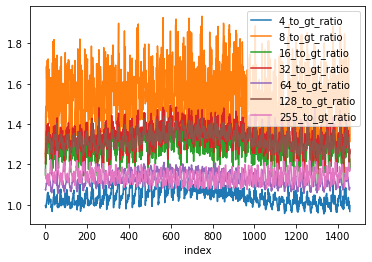

In [161]:
dff.reset_index().plot(x='index', y=["4_to_gt_ratio", "8_to_gt_ratio", "16_to_gt_ratio", "32_to_gt_ratio", "64_to_gt_ratio", "128_to_gt_ratio", "255_to_gt_ratio"])

In [162]:
new_df = pd.DataFrame()

In [163]:
new_df['4_diff'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - (dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))/((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()))
new_df['8_diff'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - (dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))/((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()))
new_df['16_diff'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - (dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))/((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()))
new_df['32_diff'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - (dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))/((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()))
new_df['64_diff'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - (dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))/((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()))
new_df['128_diff'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - (dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))/((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()))
new_df['255_diff'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - (dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))/((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()))

In [164]:
new_df['A-1_4'] = 100 * ((dff['4_mapping'] / dff['4_mapping'].mean()) - 1)
new_df['A-1_8'] = 100 * ((dff['8_mapping'] / dff['8_mapping'].mean()) - 1)
new_df['A-1_16'] = 100 * ((dff['16_mapping'] / dff['16_mapping'].mean()) - 1)
new_df['A-1_32'] = 100 * ((dff['32_mapping'] / dff['32_mapping'].mean()) - 1)
new_df['A-1_64'] = 100 * ((dff['64_mapping'] / dff['64_mapping'].mean()) - 1)
new_df['A-1_128'] = 100 * ((dff['128_mapping'] / dff['128_mapping'].mean()) - 1)
new_df['A-1_255'] = 100 * ((dff['255_mapping'] / dff['255_mapping'].mean()) - 1)

In [165]:
new_df['B-1_4'] = 100 * ((dff['4_ground_truth_mapping'] / dff['4_ground_truth_mapping'].mean()) - 1)
new_df['B-1_8'] = 100 * ((dff['8_ground_truth_mapping'] / dff['8_ground_truth_mapping'].mean()) - 1)
new_df['B-1_16'] = 100 * ((dff['16_ground_truth_mapping'] / dff['16_ground_truth_mapping'].mean()) - 1)
new_df['B-1_32'] = 100 * ((dff['32_ground_truth_mapping'] / dff['32_ground_truth_mapping'].mean()) - 1)
new_df['B-1_64'] = 100 * ((dff['64_ground_truth_mapping'] / dff['64_ground_truth_mapping'].mean()) - 1)
new_df['B-1_128'] = 100 * ((dff['128_ground_truth_mapping'] / dff['128_ground_truth_mapping'].mean()) - 1)
new_df['B-1_255'] = 100 * ((dff['255_ground_truth_mapping'] / dff['255_ground_truth_mapping'].mean()) - 1)

In [166]:
new_df

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,-4.089712,-18.651656,-11.022311,-9.940918,-4.925117,-5.549652,3.171388,18.395750,14.537882,13.674173,...,11.476013,7.281792,14.324614,23.444266,40.799280,27.755817,22.201965,17.250749,13.585386,10.810386
1,-4.529413,-5.303295,-5.210636,-6.658365,-5.193412,-5.271570,1.071267,4.336629,5.111917,5.907614,...,9.517305,8.492808,13.040916,9.286674,10.998494,11.729428,14.725863,15.516555,14.530356,11.842781
2,-5.045981,-2.197312,-1.541504,-2.719805,-3.931226,-2.196580,0.822292,6.071584,5.608020,6.331245,...,3.385698,6.284484,10.246986,11.708367,7.980693,7.996008,8.449629,7.616340,8.671542,9.347827
3,-4.017500,-7.122959,-4.649585,-2.734855,-3.745008,-3.611685,-0.364819,10.438886,8.522628,9.226053,...,7.388275,8.207863,11.606195,15.061481,16.845484,14.552258,11.587746,11.566448,12.262428,12.014847
4,-3.267765,-13.254816,-6.749059,-4.603557,-3.057890,-2.540659,-1.006911,20.011054,15.592102,15.227485,...,11.050207,9.133934,7.906125,24.065213,33.254777,23.567102,17.679385,14.553114,11.978937,9.003695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,-1.994877,-4.427794,-9.045164,-7.482011,-4.028100,-4.517881,6.039274,-18.696400,-12.933846,-13.367571,...,-10.495577,-11.667050,-1.381806,-17.041479,-8.900131,-4.752256,-7.148658,-6.738928,-7.487444,-6.998426
1453,-5.608209,-3.485774,-2.776172,-3.490804,-4.628856,-2.787293,5.373215,-10.440405,-9.709173,-8.990057,...,-12.709769,-11.168397,-1.457318,-5.119297,-6.448168,-6.391319,-7.056360,-8.473122,-8.621408,-6.482228
1454,-5.716165,-13.738201,-8.818327,-10.950616,-5.139469,-7.543122,2.485785,3.917847,-1.647492,-3.271045,...,-2.575586,-6.253096,4.130543,10.218094,14.016296,6.083768,6.695976,2.702792,1.395274,1.604865
1455,-3.723708,-5.349852,-4.745751,-4.504716,-4.449923,-4.498009,3.869663,-17.918661,-11.631574,-9.272477,...,-9.047837,-7.677820,1.336613,-14.743975,-6.636780,-4.752256,-4.841219,-4.812046,-3.329576,-2.438682


In [167]:
new_df[new_df['4_diff'] < 10]

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,-4.089712,-18.651656,-11.022311,-9.940918,-4.925117,-5.549652,3.171388,18.395750,14.537882,13.674173,...,11.476013,7.281792,14.324614,23.444266,40.799280,27.755817,22.201965,17.250749,13.585386,10.810386
1,-4.529413,-5.303295,-5.210636,-6.658365,-5.193412,-5.271570,1.071267,4.336629,5.111917,5.907614,...,9.517305,8.492808,13.040916,9.286674,10.998494,11.729428,14.725863,15.516555,14.530356,11.842781
2,-5.045981,-2.197312,-1.541504,-2.719805,-3.931226,-2.196580,0.822292,6.071584,5.608020,6.331245,...,3.385698,6.284484,10.246986,11.708367,7.980693,7.996008,8.449629,7.616340,8.671542,9.347827
3,-4.017500,-7.122959,-4.649585,-2.734855,-3.745008,-3.611685,-0.364819,10.438886,8.522628,9.226053,...,7.388275,8.207863,11.606195,15.061481,16.845484,14.552258,11.587746,11.566448,12.262428,12.014847
4,-3.267765,-13.254816,-6.749059,-4.603557,-3.057890,-2.540659,-1.006911,20.011054,15.592102,15.227485,...,11.050207,9.133934,7.906125,24.065213,33.254777,23.567102,17.679385,14.553114,11.978937,9.003695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,-1.994877,-4.427794,-9.045164,-7.482011,-4.028100,-4.517881,6.039274,-18.696400,-12.933846,-13.367571,...,-10.495577,-11.667050,-1.381806,-17.041479,-8.900131,-4.752256,-7.148658,-6.738928,-7.487444,-6.998426
1453,-5.608209,-3.485774,-2.776172,-3.490804,-4.628856,-2.787293,5.373215,-10.440405,-9.709173,-8.990057,...,-12.709769,-11.168397,-1.457318,-5.119297,-6.448168,-6.391319,-7.056360,-8.473122,-8.621408,-6.482228
1454,-5.716165,-13.738201,-8.818327,-10.950616,-5.139469,-7.543122,2.485785,3.917847,-1.647492,-3.271045,...,-2.575586,-6.253096,4.130543,10.218094,14.016296,6.083768,6.695976,2.702792,1.395274,1.604865
1455,-3.723708,-5.349852,-4.745751,-4.504716,-4.449923,-4.498009,3.869663,-17.918661,-11.631574,-9.272477,...,-9.047837,-7.677820,1.336613,-14.743975,-6.636780,-4.752256,-4.841219,-4.812046,-3.329576,-2.438682


<AxesSubplot:>

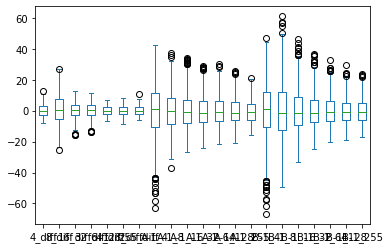

In [168]:
new_df.plot.box()

<AxesSubplot:>

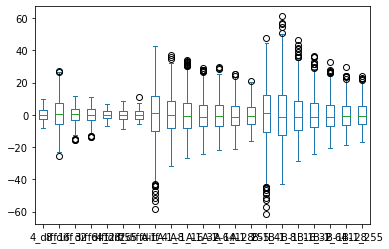

In [169]:
new_df[new_df['4_diff'] < 10].plot.box()

In [170]:
new_df[new_df['4_diff'] > 10].count()

4_diff      6
8_diff      6
16_diff     6
32_diff     6
64_diff     6
128_diff    6
255_diff    6
A-1_4       6
A-1_8       6
A-1_16      6
A-1_32      6
A-1_64      6
A-1_128     6
A-1_255     6
B-1_4       6
B-1_8       6
B-1_16      6
B-1_32      6
B-1_64      6
B-1_128     6
B-1_255     6
dtype: int64

<AxesSubplot:xlabel='index'>

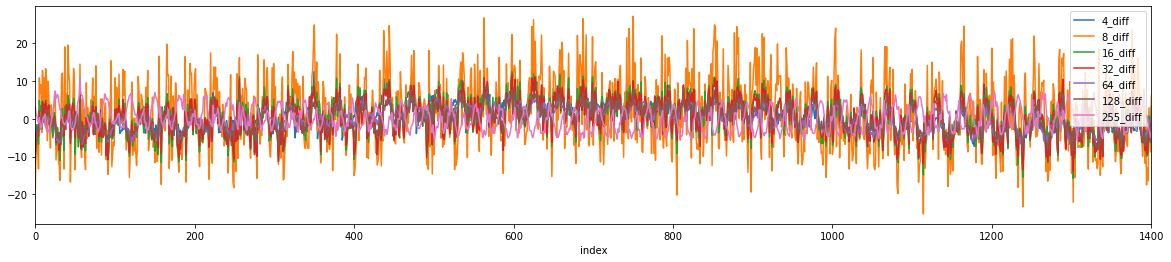

In [171]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

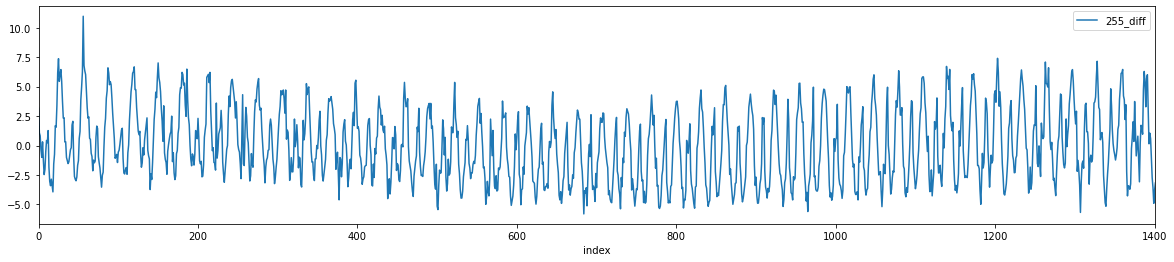

In [172]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['255_diff'])

<AxesSubplot:xlabel='index'>

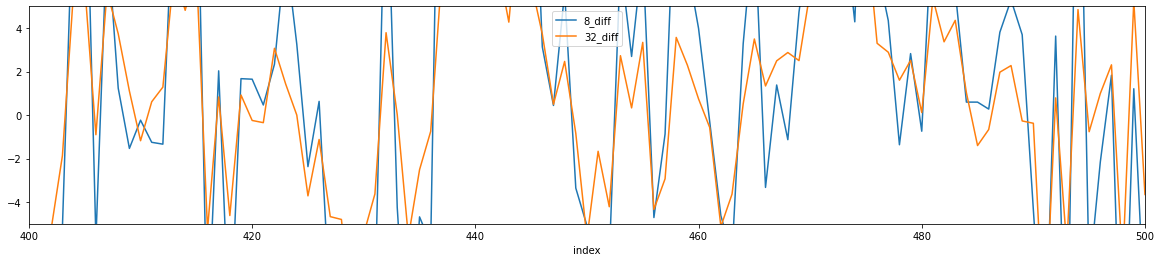

In [173]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[400, 500], x='index',ylim=[-5, 5], y=['8_diff', '32_diff'])

<AxesSubplot:xlabel='index'>

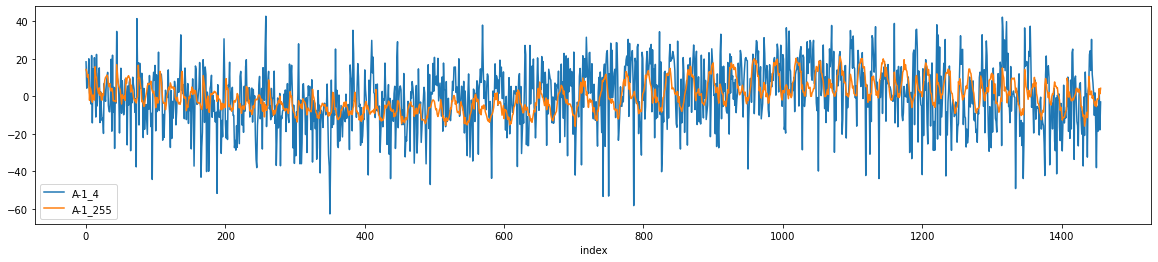

In [174]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_4', 'A-1_255'])

<AxesSubplot:xlabel='index'>

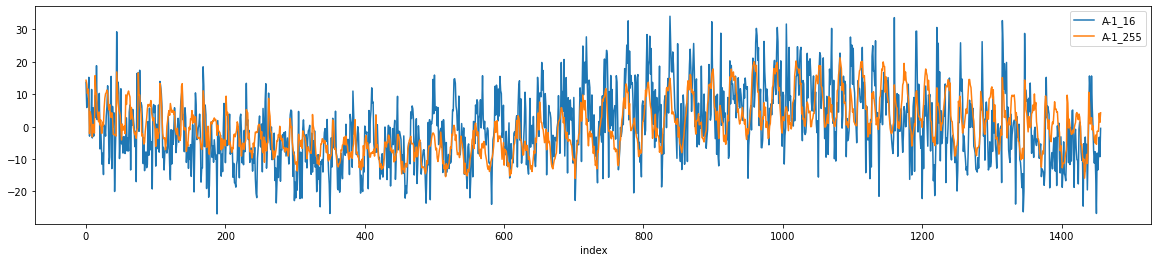

In [175]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_16', 'A-1_255'])

<AxesSubplot:xlabel='index'>

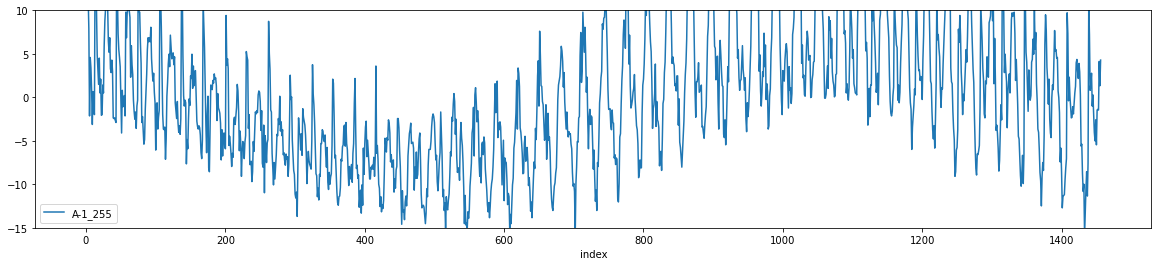

In [176]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['A-1_255'], ylim=[-15, 10])

<AxesSubplot:xlabel='index'>

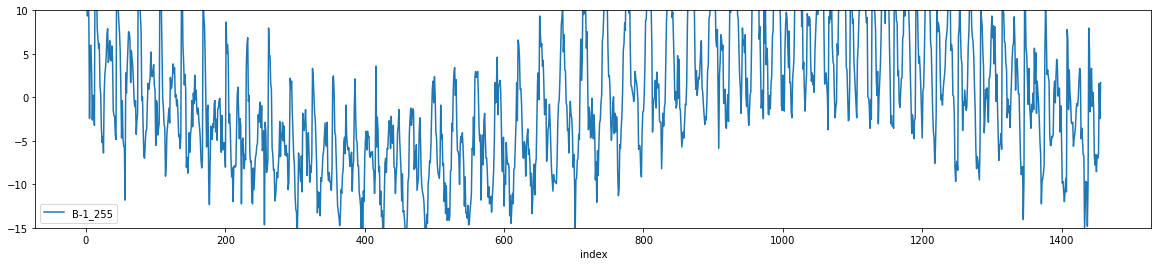

In [177]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['B-1_255'], ylim=[-15, 10])

In [178]:
new_df[new_df['A-1_255'] > 5].count()

4_diff      347
8_diff      347
16_diff     347
32_diff     347
64_diff     347
128_diff    347
255_diff    347
A-1_4       347
A-1_8       347
A-1_16      347
A-1_32      347
A-1_64      347
A-1_128     347
A-1_255     347
B-1_4       347
B-1_8       347
B-1_16      347
B-1_32      347
B-1_64      347
B-1_128     347
B-1_255     347
dtype: int64

In [179]:
new_df[new_df['A-1_255'] < -5].count()

4_diff      424
8_diff      424
16_diff     424
32_diff     424
64_diff     424
128_diff    424
255_diff    424
A-1_4       424
A-1_8       424
A-1_16      424
A-1_32      424
A-1_64      424
A-1_128     424
A-1_255     424
B-1_4       424
B-1_8       424
B-1_16      424
B-1_32      424
B-1_64      424
B-1_128     424
B-1_255     424
dtype: int64

<AxesSubplot:xlabel='index'>

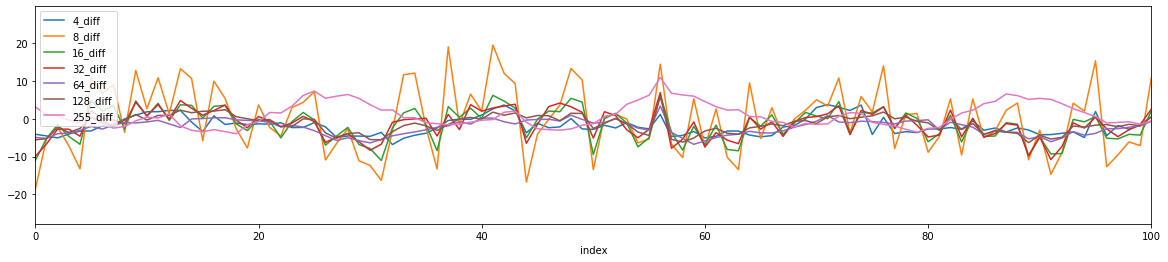

In [180]:
new_df[new_df['4_diff'] < 10].reset_index().plot(figsize=[20, 4],xlim=[0, 100], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

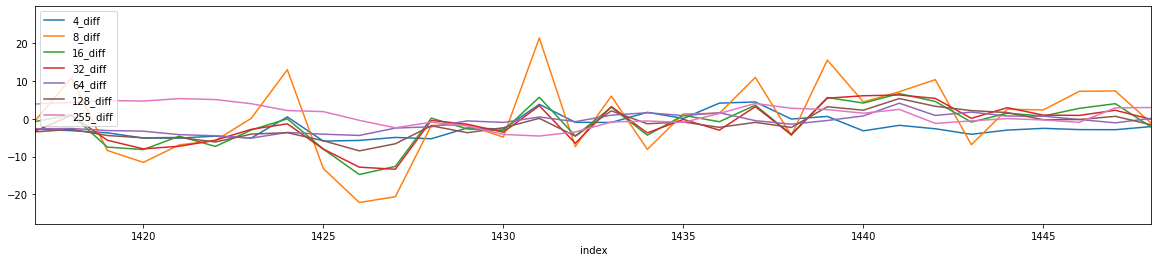

In [181]:
new_df.reset_index().plot(figsize=[20, 4],xlim=[1417, 1448], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [182]:
dff

,4_ground_truth_mapping,8_ground_truth_mapping,16_ground_truth_mapping,32_ground_truth_mapping,64_ground_truth_mapping,128_ground_truth_mapping,255_ground_truth_mapping,4_mapping,8_mapping,16_mapping,...,64_diff_percentage,128_diff_percentage,255_diff_percentage,4_normalized,8_normalized,16_normalized,32_normalized,64_normalized,128_normalized,255_normalized
0,1988,1493,1403,1324,1217,1202,1288,1979,1847,1610,...,13.18505,32.67898,14.002355,2068.486866,2299.527045,1815.623109,1774.441148,1377.462063,1594.801339,1468.350337
1,1760,1177,1227,1243,1199,1212,1300,1744,1695,1500,...,13.18505,32.67898,14.002355,1831.255978,1812.822057,1587.861408,1665.883948,1357.088754,1608.069237,1482.030620
2,1799,1145,1186,1175,1117,1150,1271,1773,1703,1506,...,13.18505,32.67898,14.002355,1871.834945,1763.535476,1534.803284,1574.749508,1264.277013,1525.808270,1448.969937
3,1853,1239,1258,1209,1158,1188,1302,1846,1750,1547,...,13.18505,32.67898,14.002355,1928.021208,1908.314808,1627.978525,1620.316728,1310.682884,1576.226282,1484.310667
4,1998,1413,1357,1275,1189,1185,1267,2006,1864,1632,...,13.18505,32.67898,14.002355,2078.891729,2176.310592,1756.094483,1708.770743,1345.770249,1572.245912,1444.409843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1336,966,1046,1006,968,979,1081,1359,1404,1227,...,13.18505,32.67898,14.002355,1390.089765,1487.838664,1353.629203,1348.253621,1095.631288,1298.927214,1232.365462
1453,1528,992,1028,1007,950,967,1087,1497,1456,1289,...,13.18505,32.67898,14.002355,1589.863144,1527.884011,1330.335393,1349.593834,1075.257979,1283.005736,1239.205603
1454,1775,1209,1165,1156,1066,1073,1181,1737,1586,1370,...,13.18505,32.67898,14.002355,1846.863273,1862.108638,1507.627172,1549.285473,1206.552637,1423.645455,1346.367817
1455,1373,990,1046,1031,988,1023,1134,1372,1425,1285,...,13.18505,32.67898,14.002355,1428.587760,1524.803600,1353.629203,1381.758930,1118.268298,1357.305965,1292.786710


<AxesSubplot:xlabel='index'>

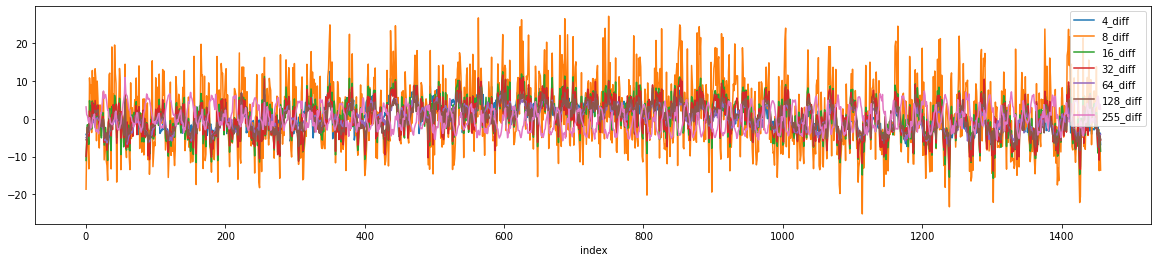

In [183]:
new_df.reset_index().plot(figsize=[20, 4], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])